In [15]:
# Démarrage de l'exercice 1
import visualID as vID
from visualID import color
vID.init()

**Début à:** Monday 06 June 2022, 23:14:31  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./svg/logoBegin.svg" style="margin-left:auto; margin-right:auto"/></p>

### Pandas. Suggestion de petite(s) application(s) en autonomie. Corrigé

#### Importation des librairies

In [26]:
%matplotlib inline
import numpy as np 
import seaborn as sb
from pylab import *
import random

#### a. Recherche de corrélation entre données 

<div class="warn">La première partie a pour but de créer des données au format <code>pandas</code>. Certaines sont corrélées entre elles. On va vérifier que la carte thermique est cohérente avec les corrélations</div>


Création des données. Vous n'avez aucune intervention à faire dans cette cellule, à part l'exécuter. On va générer :
- un jeu de 100 valeurs aléatoires X1, comprises entre [-10, 10]
- un deuxième jeu de 100 valeurs aléatoires X2, dans le même intervalle
- des valeurs bruitées, autour d'une fonction $f_1(x)=2x$
- des valeurs bruitées, autour d'une fonction $f_2(x)=-3x$  


Pour $f_1$ et $f_2$, les valeurs de $x$ seront celles du tableau X1

In [18]:
def noiseF(f, X):
    noise = 2
    N = noise * np.random.normal(0,1,nbp)
    # c_ "translates slice objects to concatenation along the second axis of the resulting 2D array" (cf doc)
    # en d'autres termes on concatène les colonnes de A & B quand on appelle c_(A,B) 
    tab = np.c_[X,f(X)+N]
    return tab 

def f1(x):
    return 2*x
def f2(x):
    return -3*x

nbp = 100
xmin = -10
xmax = 10. 
# vecteurs X1 & X2
# random.uniform(low=0.0, high=1.0, size=None)
X1 = np.random.uniform(xmin,xmax,nbp)
X2 = np.random.uniform(xmin,xmax,nbp)

data1 = noiseF(f1,X1)
data2 = noiseF(f2,X1)

On va tracer les 2 fonctions pour voir à quoi elles ressemblent.  Vérifiez de visu que les distributions de points sont cohérentes avec les expressions des fonctions

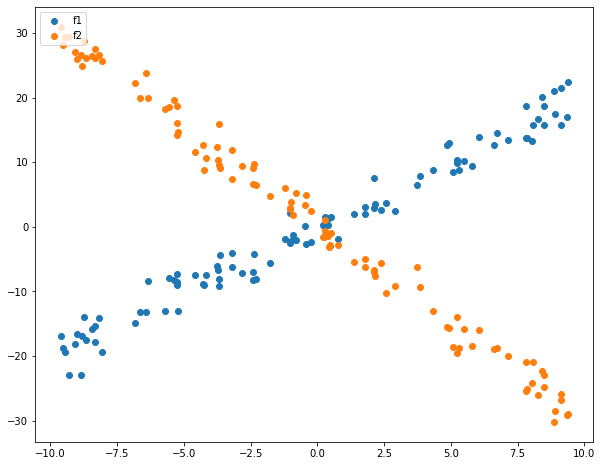

In [19]:
figure(figsize = (10,8))
scatter(data1[:,0],data1[:,1],label='f1')
scatter(data2[:,0],data2[:,1],label='f2')
legend(loc="upper left")

On va maintenant stocker ces données au format pandas dans un tableau nommé `df`. Les deux premières colonnes du tableau `df` vont contenir les valeurs de X1 et X2, et les suivantes les valeurs que prennent les fonctions f1 et f2 pour chacune des valeurs de X1

In [20]:
import pandas as pd
df = pd.DataFrame(X1, columns = ['X1'])
df['Xb'] = pd.DataFrame(X2)
df['f1'] = pd.DataFrame(data1[:,1])
df['f2'] = pd.DataFrame(data2[:,1])

<div class="warn"><b>Maintenant, à vous de jouer</b></div> 
(1) afficher le tableau `df`, qui contient les données

In [21]:
display(df)

,X1,Xb,f1,f2
0,-0.441706,-1.082594,-2.637136,4.964715
1,6.633407,-9.065581,12.631617,-18.929825
2,-4.166116,1.382282,-7.488487,10.686852
3,-5.547800,-7.859712,-7.875392,18.482463
4,0.277318,-1.495114,1.510177,-0.695558
...,...,...,...,...
95,8.504973,0.084720,18.637357,-22.925019
96,2.569928,-3.755076,3.663523,-10.264752
97,0.386188,-6.793776,0.293143,-1.448053
98,5.508758,-3.651696,10.198895,-15.870625


(2) Afficher un aperçu de la distribution statistique des données (*suggestion*: utiliser la fonction `describe` de pandas)

In [22]:
df.describe()

,X1,Xb,f1,f2
count,100.000000,100.000000,100.000000,100.000000
mean,-0.283051,-0.299991,-0.609606,1.177992
std,5.800836,6.091025,11.732504,17.765814
min,-9.614463,-9.577610,-22.947482,-30.201198
25%,-5.236368,-5.846450,-8.426823,-15.519879
50%,-0.447111,-1.055963,-1.835076,2.644711
75%,4.969118,5.480318,8.988825,14.962995
max,9.387930,9.965643,22.390514,30.955226


(3) Tracer toutes ces données les unes en fonctions des autres (*suggestion*: utiliser la fonction `pairplot` de pandas)

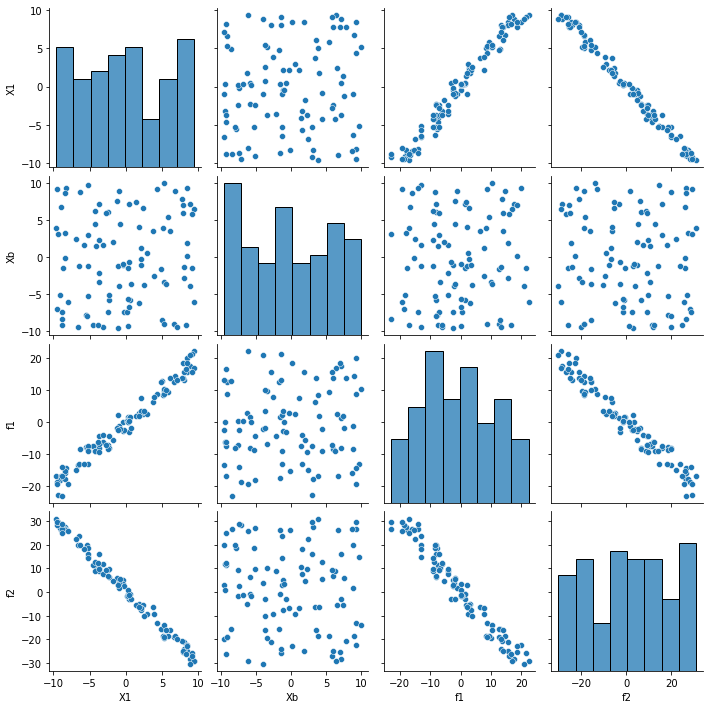

In [23]:
sb.pairplot(df)

(4) Tracer une carte thermique (*suggestion*: utiliser la fonction `heatmap` de pandas)

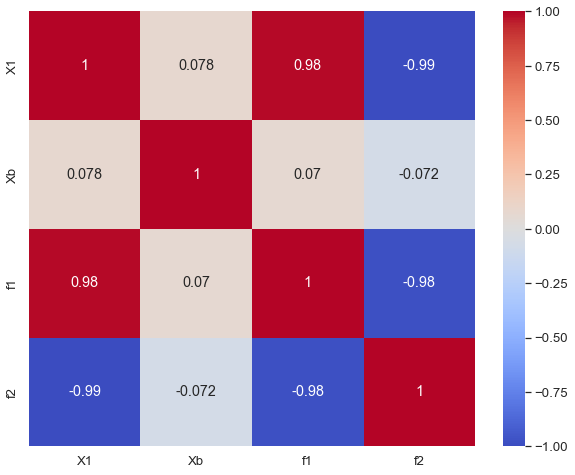

In [24]:
plt.figure(figsize = (10,8))
sb.set(font_scale=1.2)
fig = sb.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')
savefig("svg/heatmap1.png")

<div class="warn">
Si tout va bien, vous venez d'obtenir la carte thermique suivante (<i>les valeurs peuvent légèrement changer compte tenu du bruit statistique,</i> cf variable <code>noise</code></i>):
<p style="text-align: center"><img src="./svg/heatmap1.png" style="margin-left:auto; margin-right:auto" id="img_heatmap1"/></p>   
    
<b>Commentaires</b><br>
    <li> les deux séries de variables X1 et X2 ont été générées aléatoirement. Les deux séries sont indépendantes l'une de l'autre, ou bien cela signifierait qu'il y a un problème avec le générateur utilisé
    <li> f1 et f2 sont des fonctions des nombres contenus dans X1. Il ne peut donc pas y avoir de corrélation statistique avec X2.
    <li> f1 étant une fonction croissante de X1 (au bruit statistique près), il y a corrélation positive entre les deux. On ne peut pas onbtenir 1 à cause de la petite fluctuation positive introduite (reprenez le sujet et créez un bruit élevé en augmentant la valeur de <code>noise</code>). 
    <li> il y a une forte corrélation négative entre f2 et X1, puisque f2 est une fonction qui décroit en fonction de X1
    <li> la forte corrélation négative entre f1 et f2 est également attendue
</div>

In [25]:
vID.end()

**Fin à:** Monday 06 June 2022, 23:15:06  
**Durée:** 00:00:35 588ms

<p style="text-align: center"><img width="800px" src="./svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>